## How are in-demand skills trending for Data Analysts?

#### Methodology

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [8]:
#  Importing Libraries
import ast
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import matplotlib.ticker as mtick 
from matplotlib.ticker import PercentFormatter 

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x:  ast.literal_eval(x) if pd.notna(x) else x)

In [9]:
df_DS_US = df[(df["job_title_short"] == "Data Scientist") & (df["job_country"] == "United States")].copy()

df_DS_US["job_posted_month_no"] = df_DS_US["job_posted_date"].dt.month

df_DS_US_explode = df_DS_US.explode("job_skills")

In [10]:
df_DS_US_pivot = df_DS_US_explode.pivot_table(index="job_posted_month_no", columns="job_skills", aggfunc="size", fill_value=0)

df_DS_US_pivot.loc["Total"] = df_DS_US_pivot.sum()

df_DS_US_pivot = df_DS_US_pivot[df_DS_US_pivot.loc["Total"].sort_values(ascending=False).index]

df_DS_US_pivot = df_DS_US_pivot.drop("Total")

In [11]:
DS_totals = df_DS_US.groupby("job_posted_month_no").size()

In [12]:
df_DS_US_percent = df_DS_US_pivot.div(DS_totals/100, axis=0)

df_DS_US_percent

job_skills,python,sql,r,sas,tableau,aws,spark,java,tensorflow,azure,...,fedora,mattermost,nuix,asp.net core,shogun,clickup,ocaml,wrike,symfony,couchdb
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,75.820680,54.519161,48.618944,24.584237,23.571945,19.725235,19.609544,13.246565,12.957339,11.814895,...,0.000000,0.000000,0.014461,0.014461,0.000000,0.014461,0.000000,0.000000,0.014461,0.014461
2,75.020178,53.874092,47.094431,23.083132,25.585149,17.231638,18.058918,13.014528,11.400323,11.561743,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,71.019042,50.763758,45.804562,23.938062,23.561415,17.744298,16.467880,12.031806,11.069261,11.257585,...,0.000000,0.000000,0.000000,0.000000,0.020925,0.000000,0.000000,0.000000,0.000000,0.000000
4,74.419560,50.606123,44.811999,24.738032,24.922950,18.122046,16.909801,12.779947,11.958085,11.054037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,73.840530,52.387480,46.058944,26.273703,26.822024,18.208819,17.683345,14.370573,11.811743,11.903130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,73.864370,52.572659,45.360603,24.930032,24.434876,17.610334,17.696448,12.615716,11.560818,12.228202,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021529,0.000000,0.000000
7,72.621001,50.840853,45.324036,22.682527,25.082034,17.637408,16.447908,11.915505,11.689910,12.448728,...,0.020509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,72.269706,52.611586,45.837290,25.292814,24.058246,17.030706,17.014878,12.139918,12.804685,11.506806,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,68.126095,47.176007,39.207531,25.350263,20.161996,15.258319,16.199650,11.690018,12.412434,12.215412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
df_DS_US_percent = df_DS_US_percent.reset_index()
df_DS_US_percent["job_posted_month"] = df_DS_US_percent["job_posted_month_no"].apply(lambda x: pd.to_datetime(x, format="%m").strftime("%b"))
df_DS_US_percent = df_DS_US_percent.set_index("job_posted_month")
df_DS_US_percent = df_DS_US_percent.drop(columns="job_posted_month_no")
df_DS_US_percent


job_skills,python,sql,r,sas,tableau,aws,spark,java,tensorflow,azure,...,fedora,mattermost,nuix,asp.net core,shogun,clickup,ocaml,wrike,symfony,couchdb
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,75.820680,54.519161,48.618944,24.584237,23.571945,19.725235,19.609544,13.246565,12.957339,11.814895,...,0.000000,0.000000,0.014461,0.014461,0.000000,0.014461,0.000000,0.000000,0.014461,0.014461
Feb,75.020178,53.874092,47.094431,23.083132,25.585149,17.231638,18.058918,13.014528,11.400323,11.561743,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,71.019042,50.763758,45.804562,23.938062,23.561415,17.744298,16.467880,12.031806,11.069261,11.257585,...,0.000000,0.000000,0.000000,0.000000,0.020925,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,74.419560,50.606123,44.811999,24.738032,24.922950,18.122046,16.909801,12.779947,11.958085,11.054037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,73.840530,52.387480,46.058944,26.273703,26.822024,18.208819,17.683345,14.370573,11.811743,11.903130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,73.864370,52.572659,45.360603,24.930032,24.434876,17.610334,17.696448,12.615716,11.560818,12.228202,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021529,0.000000,0.000000
Jul,72.621001,50.840853,45.324036,22.682527,25.082034,17.637408,16.447908,11.915505,11.689910,12.448728,...,0.020509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,72.269706,52.611586,45.837290,25.292814,24.058246,17.030706,17.014878,12.139918,12.804685,11.506806,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,68.126095,47.176007,39.207531,25.350263,20.161996,15.258319,16.199650,11.690018,12.412434,12.215412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


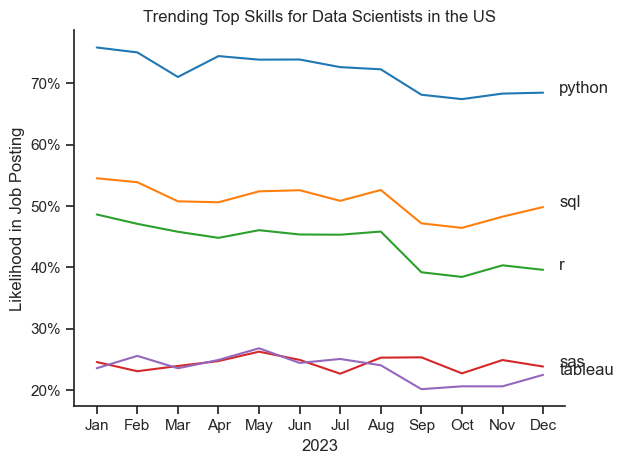

In [15]:
df_plot = df_DS_US_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette="tab10")
sns.set_theme(style="ticks")
sns.despine()

plt.title("Trending Top Skills for Data Scientists in the US")
plt.ylabel("Likelihood in Job Posting")
plt.xlabel("2023")
plt.legend().remove()

for i in range(5):
    plt.text(11.4, df_plot.iloc[-1, i], df_plot.columns[i], ha="left")

ax=plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.show()